<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.315918,96.421692,55.283403,53.566608,0.128746,257.716367,257.521044,0.195323
1,0.0,1.0,59.344709,80.634646,91.105092,88.171297,-0.278597,328.977147,329.104211,-0.127064
2,0.0,2.0,54.277636,56.624617,61.975741,25.239237,-0.143904,207.973327,208.153613,-0.180285
3,0.0,3.0,75.423449,28.627077,50.575868,84.602961,0.365678,249.595034,249.154725,0.440309
4,0.0,4.0,54.179745,49.070340,62.767510,80.193745,0.045454,256.256794,256.165194,0.091601
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,37.255547,59.442211,28.544472,63.846798,0.577784,199.666812,199.787526,-0.120715
19996,999.0,16.0,25.571313,26.527918,79.689768,68.031243,0.096762,209.917005,210.151195,-0.234190
19997,999.0,17.0,54.677369,34.305211,60.689966,41.161131,0.683670,201.517347,201.072010,0.445337
19998,999.0,18.0,70.029294,27.392256,77.822584,54.833757,-0.110640,239.967251,240.070926,-0.103675


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.315918,96.421692,55.283403,53.566608,0.128746,257.716367,257.521044,0.195323
1,0.0,1.0,59.344709,80.634646,91.105092,88.171297,-0.278597,328.977147,329.104211,-0.127064
2,0.0,2.0,54.277636,56.624617,61.975741,25.239237,-0.143904,207.973327,208.153613,-0.180285
3,0.0,3.0,75.423449,28.627077,50.575868,84.602961,0.365678,249.595034,249.154725,0.440309
4,0.0,4.0,54.179745,49.070340,62.767510,80.193745,0.045454,256.256794,256.165194,0.091601
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,37.255547,59.442211,28.544472,63.846798,0.577784,199.666812,199.787526,-0.120715
19996,999.0,16.0,25.571313,26.527918,79.689768,68.031243,0.096762,209.917005,210.151195,-0.234190
19997,999.0,17.0,54.677369,34.305211,60.689966,41.161131,0.683670,201.517347,201.072010,0.445337
19998,999.0,18.0,70.029294,27.392256,77.822584,54.833757,-0.110640,239.967251,240.070926,-0.103675


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.315918  96.421692  55.283403  53.566608  0.128746  257.716367   
      1.0    59.344709  80.634646  91.105092  88.171297 -0.278597  328.977147   
      2.0    54.277636  56.624617  61.975741  25.239237 -0.143904  207.973327   
      3.0    75.423449  28.627077  50.575868  84.602961  0.365678  249.595034   
      4.0    54.179745  49.070340  62.767510  80.193745  0.045454  256.256794   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   37.255547  59.442211  28.544472  63.846798  0.577784  199.666812   
      16.0   25.571313  26.527918  79.689768  68.031243  0.096762  209.917005   
      17.0   54.677369  34.305211  60.689966  41.161131  0.683670  201.517347   
      18.0   70.029294  27.392256  77.822584  54.833757 -0.110640  239.967251   
      19.0   58.827564  70.409797  55.976385  61.250538  0.054839  256.519123   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    257.521044  0.195323  
      1.0    329.104211 -0.127064  
      2.0    208.153613 -0.180285  
      3.0    249.154725  0.440309  
      4.0    256.165194  0.091601  
...                 ...       ...  
999.0 15.0   199.787526 -0.120715  
      16.0   210.151195 -0.234190  
      17.0   201.072010  0.445337  
      18.0   240.070926 -0.103675  
      19.0   256.792660 -0.273537  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.315918  96.421692  55.283403  53.566608  0.128746  257.716367   
      1.0    59.344709  80.634646  91.105092  88.171297 -0.278597  328.977147   
      2.0    54.277636  56.624617  61.975741  25.239237 -0.143904  207.973327   
      3.0    75.423449  28.627077  50.575868  84.602961  0.365678  249.595034   
      4.0    54.179745  49.070340  62.767510  80.193745  0.045454  256.256794   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   37.255547  59.442211  28.544472  63.846798  0.577784  199.666812   
      16.0   25.571313  26.527918  79.689768  68.031243  0.096762  209.917005   
      17.0   54.677369  34.305211  60.689966  41.161131  0.683670  201.517347   
      18.0   70.029294  27.392256  77.822584  54.833757 -0.110640  239.967251   
      19.0   58.827564  70.409797  55.976385  61.250538  0.054839  256.519123   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    257.521044  0.195323  
      1.0    329.104211 -0.127064  
      2.0    208.153613 -0.180285  
      3.0    249.154725  0.440309  
      4.0    256.165194  0.091601  
...                 ...       ...  
999.0 15.0   199.787526 -0.120715  
      16.0   210.151195 -0.234190  
      17.0   201.072010  0.445337  
      18.0   240.070926 -0.103675  
      19.0   256.792660 -0.273537  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.315918,96.421692,55.283403,53.566608,0.128746,257.716367,257.521044,0.195323
1,0.0,1.0,59.344709,80.634646,91.105092,88.171297,-0.278597,328.977147,329.104211,-0.127064
2,0.0,2.0,54.277636,56.624617,61.975741,25.239237,-0.143904,207.973327,208.153613,-0.180285
3,0.0,3.0,75.423449,28.627077,50.575868,84.602961,0.365678,249.595034,249.154725,0.440309
4,0.0,4.0,54.179745,49.070340,62.767510,80.193745,0.045454,256.256794,256.165194,0.091601
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,37.255547,59.442211,28.544472,63.846798,0.577784,199.666812,199.787526,-0.120715
19996,999.0,16.0,25.571313,26.527918,79.689768,68.031243,0.096762,209.917005,210.151195,-0.234190
19997,999.0,17.0,54.677369,34.305211,60.689966,41.161131,0.683670,201.517347,201.072010,0.445337
19998,999.0,18.0,70.029294,27.392256,77.822584,54.833757,-0.110640,239.967251,240.070926,-0.103675


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.315918  96.421692  55.283403  53.566608  0.128746  257.716367   
      1.0    59.344709  80.634646  91.105092  88.171297 -0.278597  328.977147   
      2.0    54.277636  56.624617  61.975741  25.239237 -0.143904  207.973327   
      3.0    75.423449  28.627077  50.575868  84.602961  0.365678  249.595034   
      4.0    54.179745  49.070340  62.767510  80.193745  0.045454  256.256794   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   37.255547  59.442211  28.544472  63.846798  0.577784  199.666812   
      16.0   25.571313  26.527918  79.689768  68.031243  0.096762  209.917005   
      17.0   54.677369  34.305211  60.689966  41.161131  0.683670  201.517347   
      18.0   70.029294  27.392256  77.822584  54.833757 -0.110640  239.967251   
      19.0   58.827564  70.409797  55.976385  61.250538  0.054839  256.519123   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    257.521044  0.195323  
      1.0    329.104211 -0.127064  
      2.0    208.153613 -0.180285  
      3.0    249.154725  0.440309  
      4.0    256.165194  0.091601  
...                 ...       ...  
999.0 15.0   199.787526 -0.120715  
      16.0   210.151195 -0.234190  
      17.0   201.072010  0.445337  
      18.0   240.070926 -0.103675  
      19.0   256.792660 -0.273537  

[20000 rows x 8 columns]

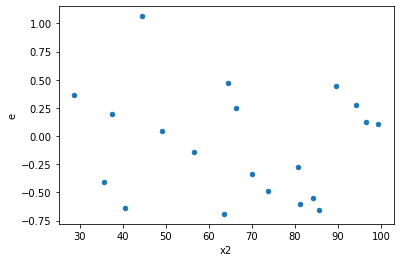

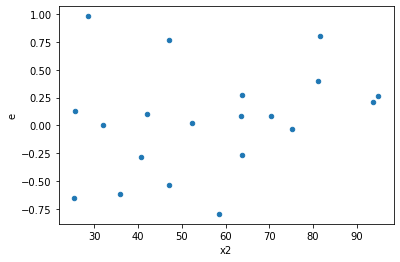

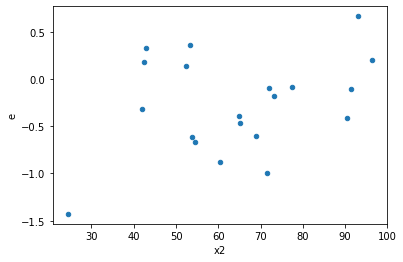

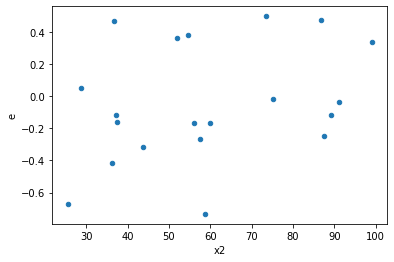

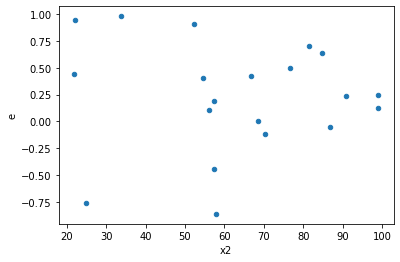

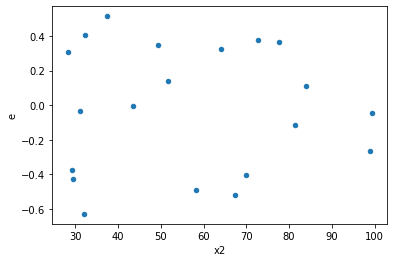

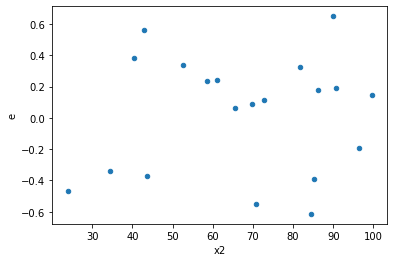

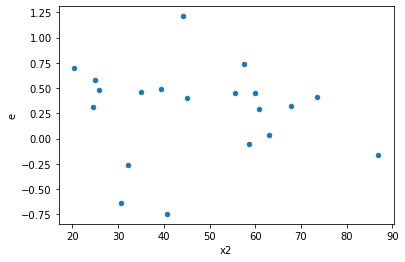

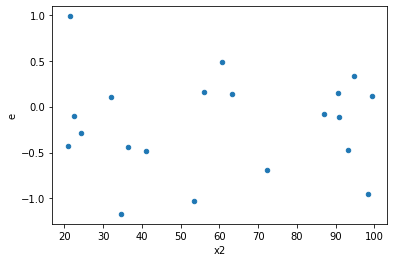

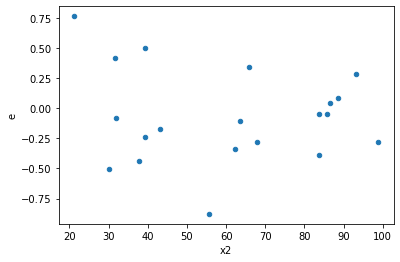

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,4.0,4.0,0.16706836846305118,0.2744020285554632,0.041767092115762794,0.0686005071388658,1.6424535121748671,0.6424942911010747,0.6787528544494627,0.32124714555053735,Reject001=1 : Homoscedasticity
15.0,4.0,4.0,0.02656939768582239,0.6014134355562155,0.0066423494214555975,0.15035335888905388,22.63556903576831,0.010437423476469698,0.9947812882617652,0.005218711738234849,Reject001=1 : Homoscedasticity
17.0,4.0,4.0,0.024354319799533813,0.10726650779065282,0.006088579949883453,0.026816626947663205,4.404414028952108,0.18008490490835194,0.909957547545824,0.09004245245417597,Reject001=1 : Homoscedasticity
18.0,4.0,4.0,0.24608003543597762,0.45205664247945776,0.061520008858994404,0.11301416061986444,1.837030954902755,0.5702846235242225,0.7148576882378888,0.28514231176211124,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,0.3369343869588734,1.0704024075609806,0.08423359673971835,0.26760060189024515,3.1768868034583693,0.28901972697120026,0.8554901365143999,0.14450986348560013,Reject001=1 : Homoscedasticity
21.0,4.0,4.0,0.3137874049729911,0.4448935569697321,0.07844685124324778,0.11122338924243302,1.4178184016277702,0.7433682248697515,0.6283158875651242,0.37168411243487576,Reject001=1 : Homoscedasticity
22.0,4.0,4.0,0.42289321247439576,0.7247974727143026,0.10572330311859894,0.18119936817857565,1.7139018819276646,0.6145207716925127,0.6927396141537436,0.30726038584625637,Reject001=1 : Homoscedasticity
23.0,4.0,4.0,0.23173303725068678,0.2390899167689066,0.057933259312671695,0.05977247919222665,1.0317472191514117,0.9765635446181822,0.5117182276909089,0.4882817723090911,Reject001=1 : Homoscedasticity
25.0,4.0,4.0,0.15140597732316605,2.3882146676689797,0.03785149433079151,0.5970536669172449,15.773582456203123,0.020477934740170234,0.9897610326299149,0.010238967370085117,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.9546450301823175,0.4459972048684525,0.23866125754557937,0.11149930121711313,0.4671864313621119,0.4792164593239934,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.45429498843267135,0.25050949147215784,0.11357374710816784,0.06262737286803946,0.5514247302978658,0.5783795901519792,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,1.9877323760532064,0.39994492461977055,0.4969330940133016,0.09998623115494264,0.20120662592108682,0.14954610362093165,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.5128066142661837,0.3489079883441584,0.12820165356654592,0.0872269970860396,0.6803890172973666,0.7181394882623167,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,2.219586632581804,0.3037294785580034,0.554896658145451,0.07593236963950085,0.13684056035456832,0.0799564398398977,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,1.0076485385756555,0.5329460373140669,0.2519121346439139,0.13323650932851672,0.5289007197563187,0.5524333601409831,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.4946532982233681,0.22808892674768602,0.12366332455584203,0.057022231686921505,0.46110867463515637,0.4718503254553911,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.8398930216113507,0.36242974527287514,0.20997325540283768,0.09060743631821878,0.431518938659053,0.4356370652135178,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,1.3015705309624426,0.45602040064759325,0.32539263274061064,0.11400510016189831,0.3503616514046229,0.3340446541798532,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      964
Reject001=0 : Heteroscedasticity     36
Name: Result_test, dtype: int64